In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load dataset
file_path = "D:/WsCube Tech/PYTHON FILES/imdb_movies.csv"
df = pd.read_csv(file_path)

# Standardizing column names to remove any extra spaces
df.columns = df.columns.str.strip().str.lower()

# Check available columns
print("Available Columns:", df.columns)

# Rename columns to match script expectations
column_mapping = {
    'budget_x': 'budget',
    'date_x': 'release_year'
}
df.rename(columns=column_mapping, inplace=True)

# Convert release_year to proper format if available
if 'release_year' in df.columns:
    df['release_year'] = pd.to_datetime(df['release_year'], errors='coerce').dt.year

# Ensure numerical columns are properly formatted
for col in ['budget', 'revenue', 'score']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Cleaning Genre Column
if 'genre' in df.columns:
    df['genre'] = df['genre'].astype(str).str.replace('\xa0', ' ')

    
# Basic Information
## Display basic information
display(df.head())
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

# Summary Statistics
print("\nSummary Statistics:")
display(df.describe())

Available Columns: Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')


,names,release_year,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country
0,Creed III,2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


Dataset Shape: (10178, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   names         10178 non-null  object 
 1   release_year  10178 non-null  int32  
 2   score         10178 non-null  float64
 3   genre         10178 non-null  object 
 4   overview      10178 non-null  object 
 5   crew          10122 non-null  object 
 6   orig_title    10178 non-null  object 
 7   status        10178 non-null  object 
 8   orig_lang     10178 non-null  object 
 9   budget        10178 non-null  float64
 10  revenue       10178 non-null  float64
 11  country       10178 non-null  object 
dtypes: float64(3), int32(1), object(8)
memory usage: 914.6+ KB

Missing Values:
names            0
release_year     0
score            0
genre            0
overview         0
crew            56
orig_title       0
status           0
orig_lang     

,release_year,score,budget,revenue
count,10178.000000,10178.000000,1.017800e+04,1.017800e+04
mean,2007.945667,63.497052,6.488238e+07,2.531401e+08
std,15.317071,13.537012,5.707565e+07,2.777880e+08
min,1903.000000,0.000000,1.000000e+00,0.000000e+00
25%,2001.000000,59.000000,1.500000e+07,2.858898e+07
50%,2013.000000,65.000000,5.000000e+07,1.529349e+08
75%,2019.000000,71.000000,1.050000e+08,4.178021e+08
max,2023.000000,100.000000,4.600000e+08,2.923706e+09


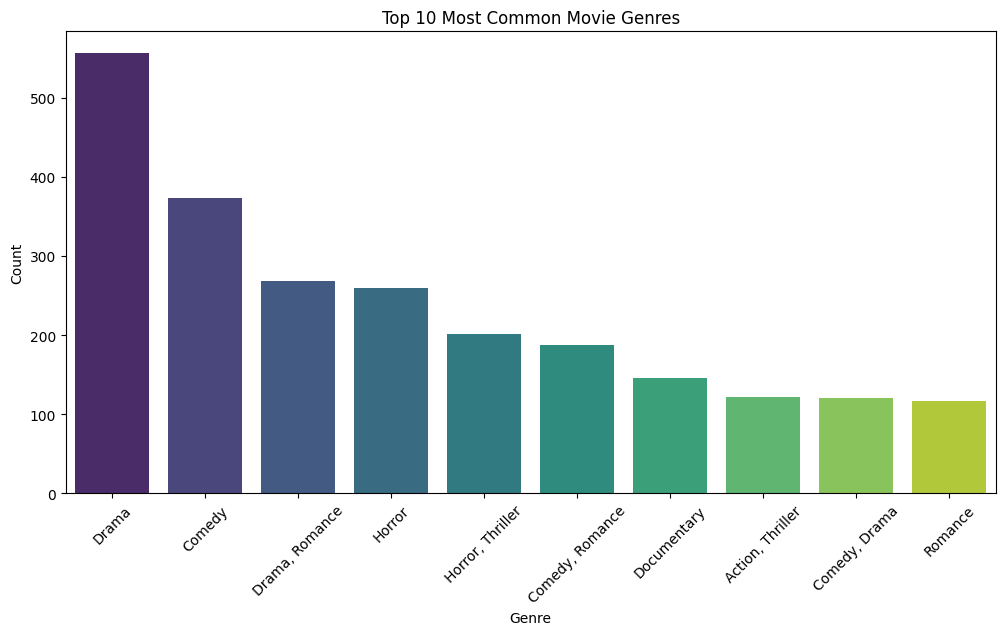

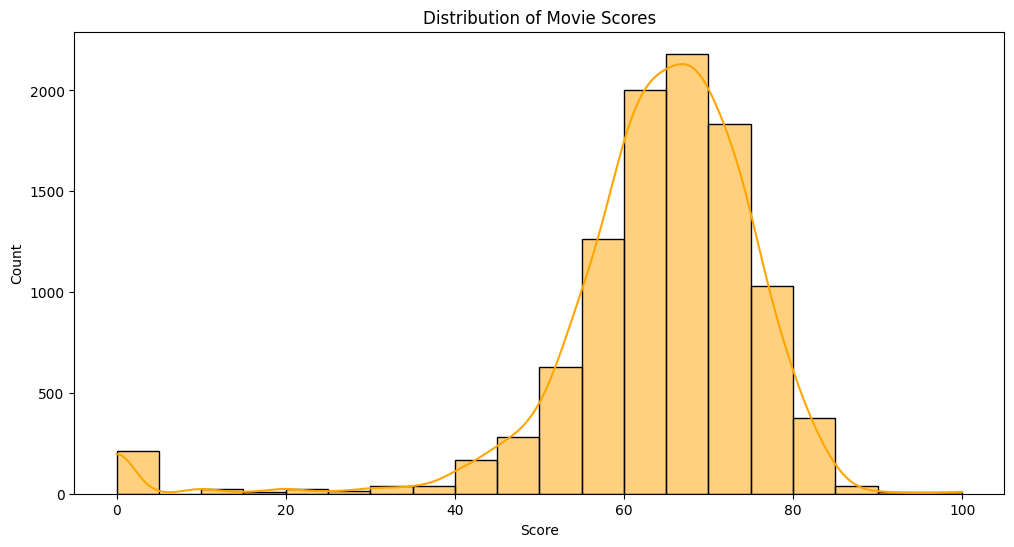

In [55]:
# Data Cleaning
## Handling missing values
required_columns = ['score', 'genre', 'budget', 'revenue']
existing_columns = [col for col in required_columns if col in df.columns]
df = df.dropna(subset=existing_columns)

## Filling missing values with median
for col in existing_columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].median())

# Feature Engineering
## Creating new columns
if {'revenue', 'budget'}.issubset(df.columns):
    df['profit'] = df['revenue'] - df['budget']
    df['profit_ratio'] = df['profit'] / df['budget'].replace(0, np.nan)

if 'release_year' in df.columns:
    df['decade'] = (df['release_year'] // 10) * 10

# Univariate Analysis
## Top 10 Movie Genres
if 'genre' in df.columns:
    plt.figure(figsize=(12,6))
    top_genres = df['genre'].value_counts().head(10)
    sns.barplot(x=top_genres.index, y=top_genres.values, hue=top_genres.index, palette='viridis', legend=False)
    plt.title('Top 10 Most Common Movie Genres')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## Distribution of Movie Scores
if 'score' in df.columns:
    plt.figure(figsize=(12,6))
    sns.histplot(df['score'], bins=20, kde=True, color='orange')
    plt.title('Distribution of Movie Scores')
    plt.xlabel('Score')
    plt.show()


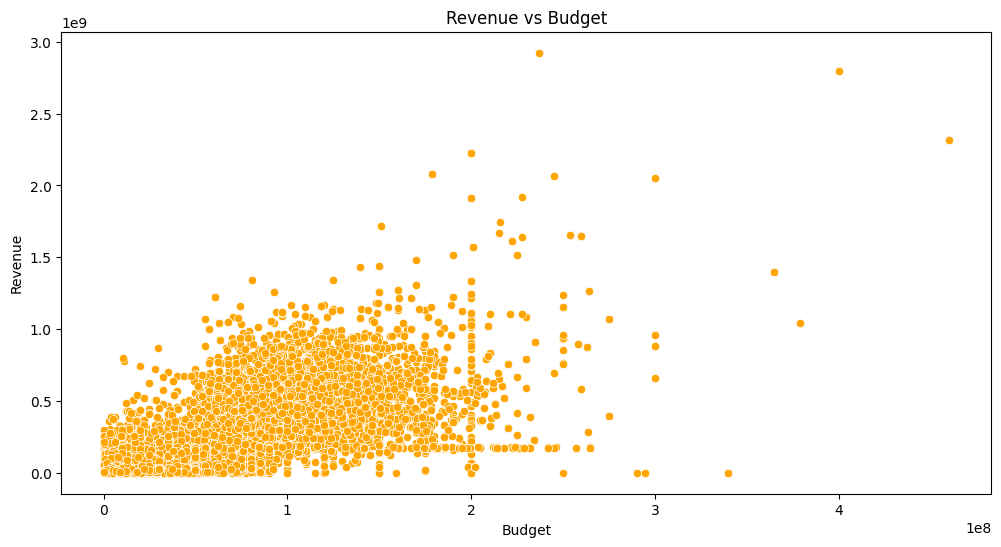

In [56]:
# Bivariate Analysis
## Revenue vs Budget
if 'budget' in df.columns and 'revenue' in df.columns:
    plt.figure(figsize=(12,6))
    sns.scatterplot(x='budget', y='revenue', data=df, color='orange')
    plt.title('Revenue vs Budget')
    plt.xlabel('Budget')
    plt.ylabel('Revenue')
    plt.show()

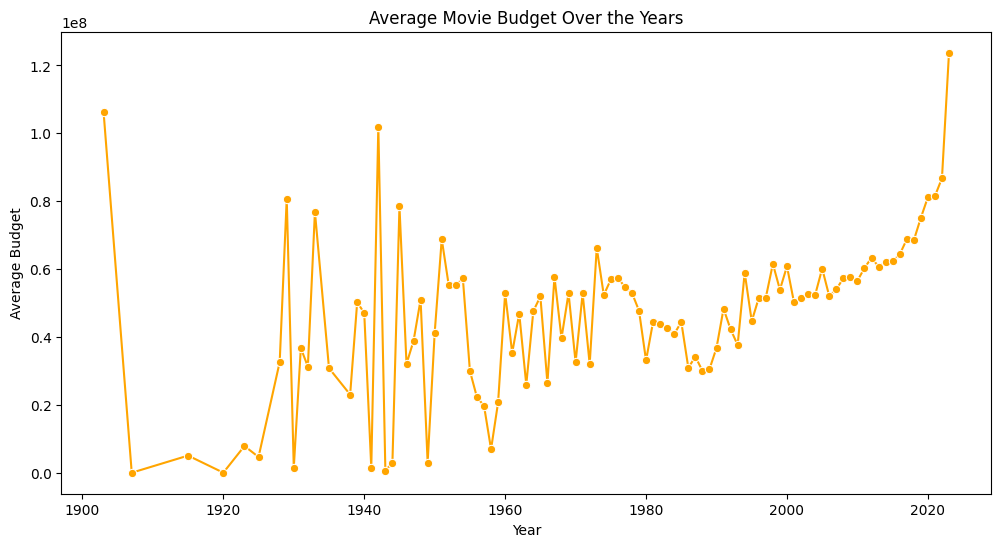

In [57]:
## Average Movie Budget Over the Years
if 'release_year' in df.columns and 'budget' in df.columns:
    average_budget_per_year = df.groupby('release_year')['budget'].mean()
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=average_budget_per_year.index, y=average_budget_per_year.values, marker='o', color='orange')
    plt.title("Average Movie Budget Over the Years")
    plt.xlabel("Year")
    plt.ylabel("Average Budget")
    plt.xticks(rotation=0)
    plt.show()

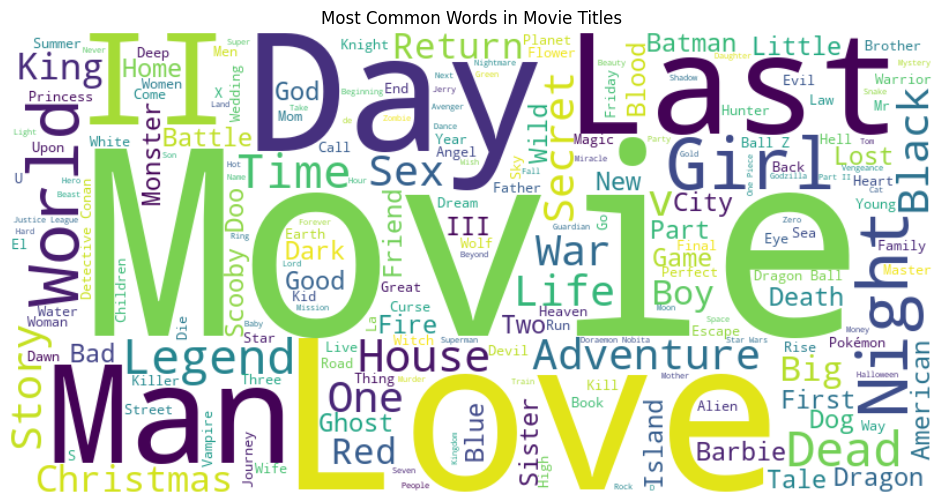

In [58]:
# Word Cloud Visualization
if 'names' in df.columns:
    text = ' '.join(df['names'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Most Common Words in Movie Titles")
    plt.show()

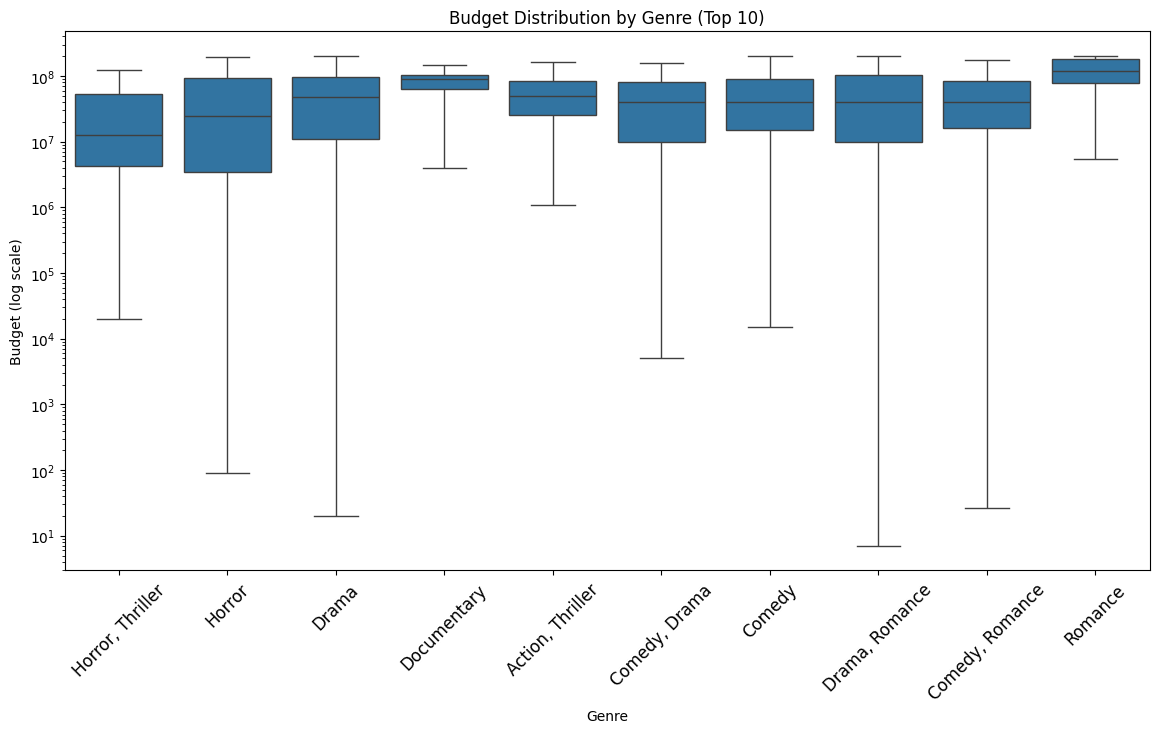

In [59]:
# Budget Distribution by Genre
if 'genre' in df.columns and 'budget' in df.columns:
    plt.figure(figsize=(14, 7))
    top_genres = df['genre'].value_counts().head(10).index
    df_filtered = df[df['genre'].isin(top_genres)]
    sns.boxplot(x='genre', y='budget', data=df_filtered, showfliers=False)
    plt.yscale('log')  # Log scale to handle wide budget range
    plt.xticks(rotation=45, fontsize=12)
    plt.title("Budget Distribution by Genre (Top 10)")
    plt.xlabel("Genre")
    plt.ylabel("Budget (log scale)")
    plt.show()

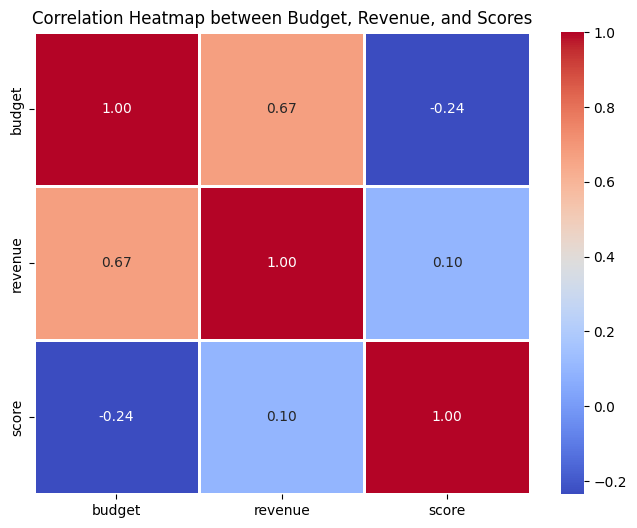

In [60]:
# Heatmap for correlations
if {'budget', 'revenue', 'score'}.issubset(df.columns):
    correlation_df = df[['budget', 'revenue', 'score']]
    correlation_matrix = correlation_df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, linewidth=2, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap between Budget, Revenue, and Scores')
    plt.show()

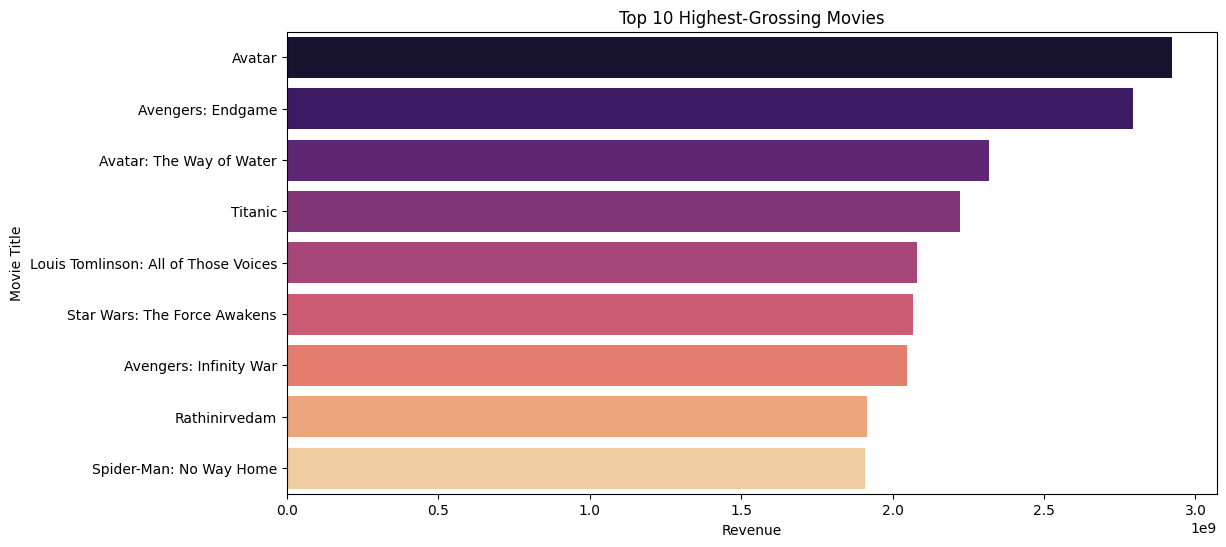

In [62]:
# Top 10 Highest-Grossing Movies
if 'names' in df.columns and 'revenue' in df.columns:
    top_movies = df[['names', 'revenue']].sort_values(by='revenue', ascending=False).head(10)
    plt.figure(figsize=(12,6))
    sns.barplot(x=top_movies['revenue'], y=top_movies['names'], hue=top_movies['names'], palette='magma', legend=False)
    plt.title('Top 10 Highest-Grossing Movies')
    plt.xlabel('Revenue')
    plt.ylabel('Movie Title')
    plt.show()


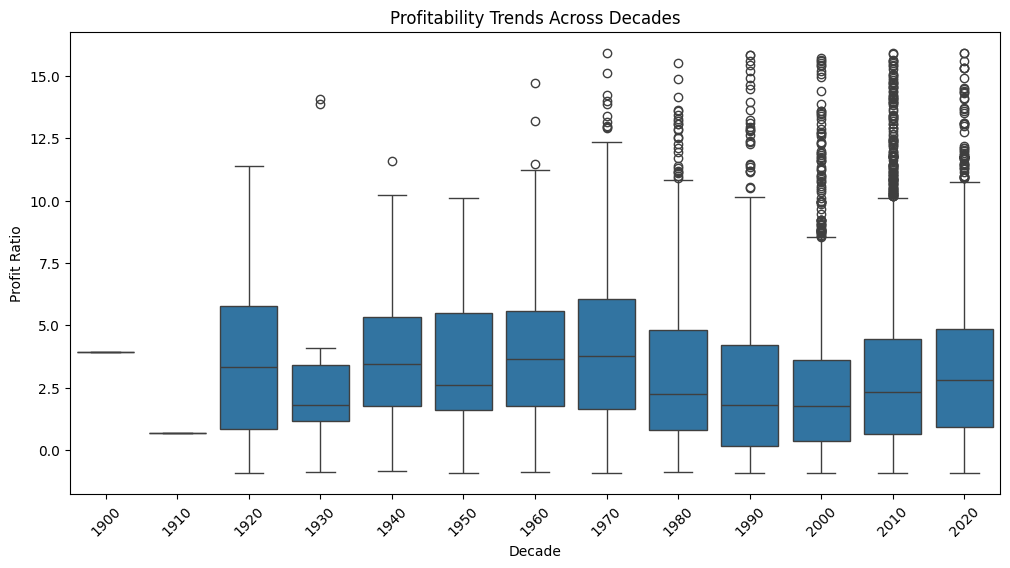

In [46]:
##Profitability Trends Across Decades
if {'decade', 'profit_ratio'}.issubset(df.columns):
    df_filtered = df.copy()
    df_filtered = df_filtered[np.isfinite(df_filtered['profit_ratio'])]  # Remove infinite values
    df_filtered = df_filtered[df_filtered['profit_ratio'].between(df_filtered['profit_ratio'].quantile(0.05), 
                                                                   df_filtered['profit_ratio'].quantile(0.95))]  # Remove extreme outliers

    plt.figure(figsize=(12,6))
    sns.boxplot(x='decade', y='profit_ratio', data=df_filtered)
    plt.title('Profitability Trends Across Decades')
    plt.xlabel('Decade')
    plt.ylabel('Profit Ratio')
    plt.xticks(rotation=45)
    plt.show()


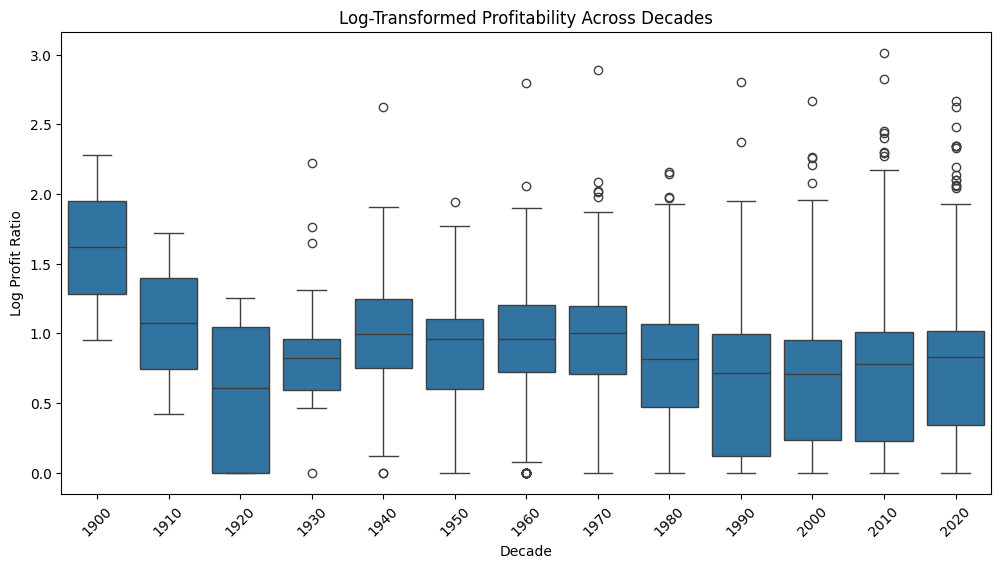

In [64]:
##Log-Transformed Profitability Across Decades

# Replace zero or negative values with NaN to avoid log issues
df['profit_ratio'] = df['profit_ratio'].replace([np.inf, -np.inf], np.nan)
df['profit_ratio'] = np.log1p(df['profit_ratio'].clip(lower=0))

if {'decade', 'profit_ratio'}.issubset(df.columns):
    df['log_profit_ratio'] = np.log1p(df['profit_ratio'])  # log(1 + x) to handle 0s
    plt.figure(figsize=(12,6))
    sns.boxplot(x='decade', y='log_profit_ratio', data=df)
    plt.title('Log-Transformed Profitability Across Decades')
    plt.xlabel('Decade')
    plt.ylabel('Log Profit Ratio')
    plt.xticks(rotation=45)
    plt.show()


In [65]:
# Ensure all plots show properly
plt.show(block=True)

# Summary Insights
print("\nKey Insights:")
print("1. The most common movie genres are displayed in the bar chart.")
print("2. Movie budget trends over the years are displayed in the line plot.")
print("3. Budget and revenue show a strong correlation, indicating higher-budget movies tend to earn more.")
print("4. The word cloud visualization highlights the most frequently used words in movie titles.")
print("5. Budget distribution varies significantly across different genres.")
print("6. The top 10 highest-grossing movies are now displayed.")
print("7. Profitability trends across decades highlight the financial performance over time.")



Key Insights:
1. The most common movie genres are displayed in the bar chart.
2. Movie budget trends over the years are displayed in the line plot.
3. Budget and revenue show a strong correlation, indicating higher-budget movies tend to earn more.
4. The word cloud visualization highlights the most frequently used words in movie titles.
5. Budget distribution varies significantly across different genres.
6. The top 10 highest-grossing movies are now displayed.
7. Profitability trends across decades highlight the financial performance over time.
